In [1]:
# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for data preporcessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifiers Library
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
df = pd.read_csv("Heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
### Features (columns) in the dataset and meaning
# for better understanding, I will rename the features:
df.columns = ['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','rest_ecg',
              'max_heart_rate','exercise_induced_angina','st_depression','st_slope','num_major_vessels','thalassemia','target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate           303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [5]:
# statistical analysis of the data
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


<Axes: >

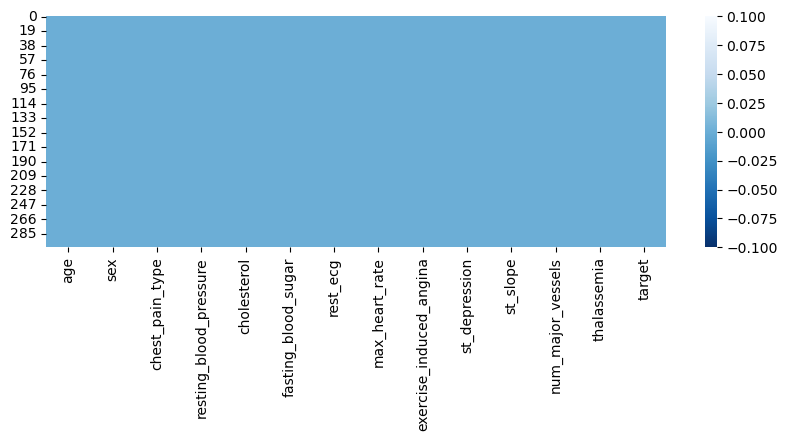

In [6]:
# check for missing value
print(df.isnull().sum())

# visualizing missing values
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

### Exploratory data Analysis
-Univarient Analysis

In [8]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<Axes: xlabel='thalassemia'>

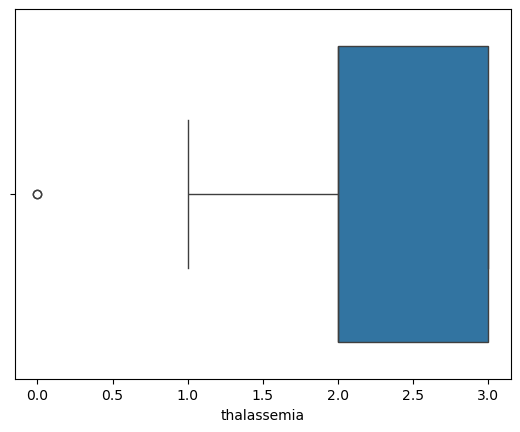

In [9]:
# Check the outliers
sns.boxplot(x=df['thalassemia'])

<Axes: xlabel='resting_blood_pressure'>

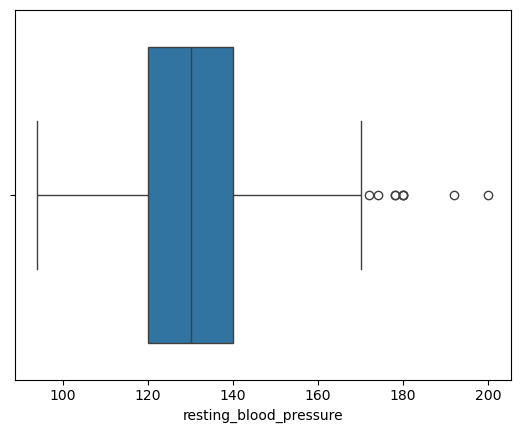

In [10]:
sns.boxplot(x=df['resting_blood_pressure'])

<Axes: xlabel='max_heart_rate'>

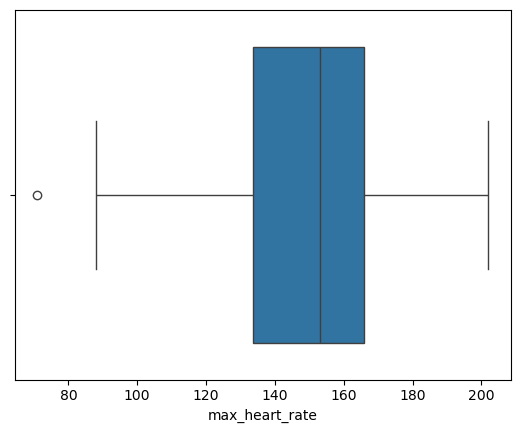

In [11]:
sns.boxplot(x=df['max_heart_rate'])

<Axes: xlabel='cholesterol'>

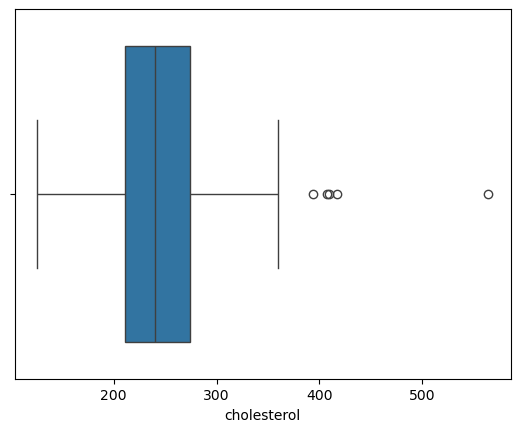

In [12]:
sns.boxplot(x=df['cholesterol'])

Text(0.5, 1.0, 'Total Number of Patients')

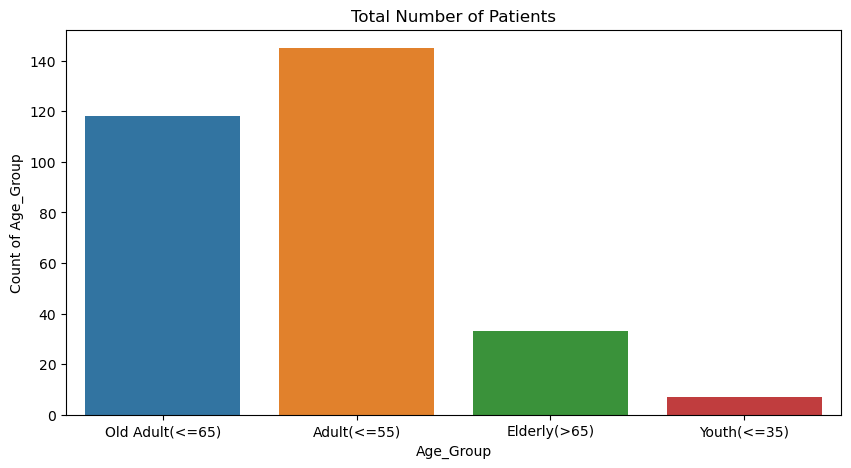

In [13]:
# Data Visualization
# Age Bracket

def age_bracket(age):
    if age <= 35:
        return 'Youth(<=35)'
    elif age <= 55:
        return 'Adult(<=55)'
    elif age <= 65:
        return 'Old Adult(<=65)'
    else:
        return 'Elderly(>65)'

df['age_bracket'] = df['age'].apply(age_bracket)

# Investigating the age group of the patients

plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df, hue='age_bracket')
plt.xlabel('Age_Group')
plt.ylabel('Count of Age_Group')
plt.title('Total Number of Patients')

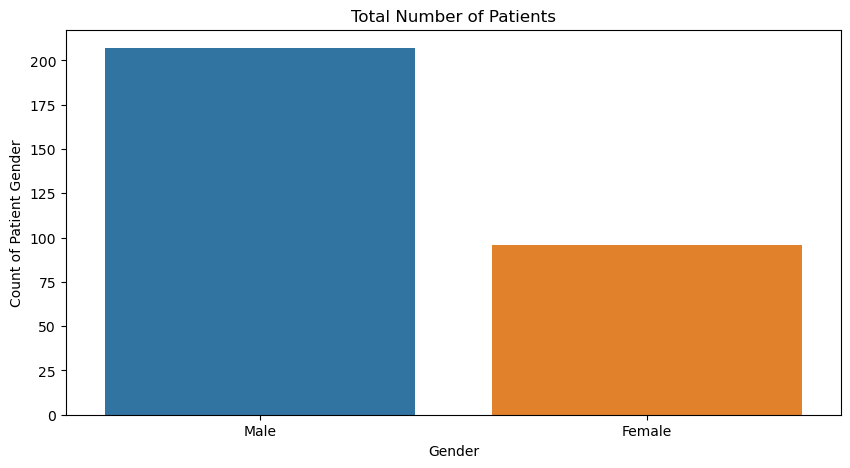

In [14]:
# Data Visualisation
# Sex
def gender(sex):
     if sex ==1:
         return 'Male'
     else:
         return 'Female'
df['gender'] = df['sex'].apply(gender)
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df, hue='gender')
plt.xlabel('Gender') 
plt.ylabel('Count of Patient Gender')
plt.title('Total Number of Patients')
plt.show()

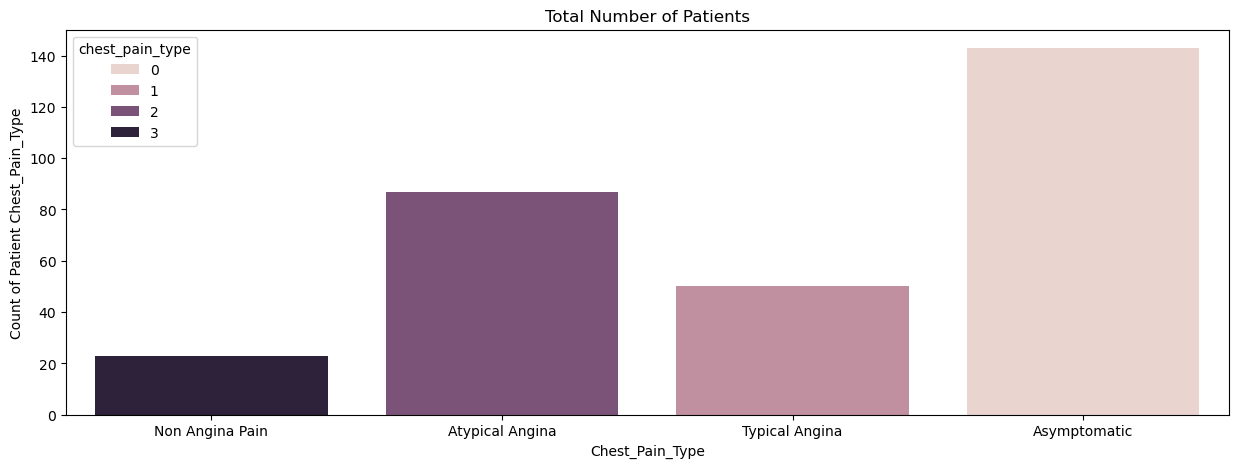

In [15]:
# Data Visualisation
# Chest Pain type: (1:typical angina, 2:atypical angina, 3:non angina pain, 4: asymptomatic)

def chest_pain(cp):
    if cp == 1:
        return 'Typical Angina'
    elif cp == 2:
        return 'Atypical Angina'
    elif cp == 3:
        return 'Non Angina Pain'
    else:
        return 'Asymptomatic'

df['cp_cat'] = df['chest_pain_type'].apply(chest_pain)

plt.figure(figsize=(15,5))
sns.countplot(x='cp_cat', data=df, hue='chest_pain_type')
plt.xlabel('Chest_Pain_Type') 
plt.ylabel('Count of Patient Chest_Pain_Type')
plt.title('Total Number of Patients')
plt.show()

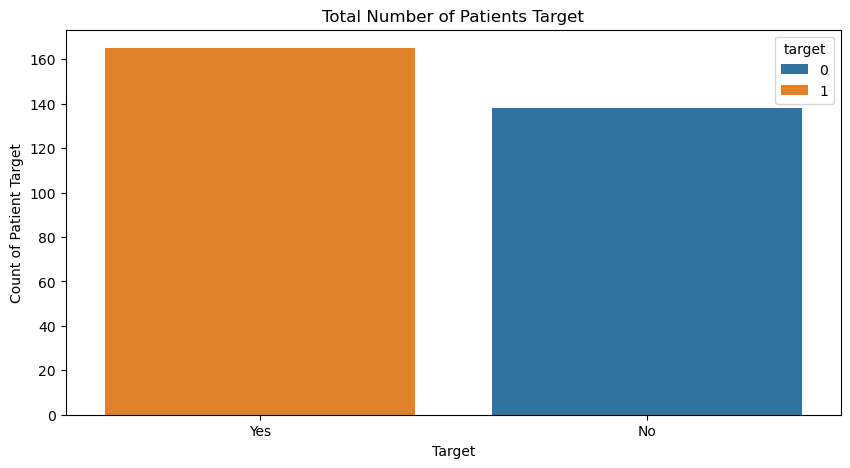

In [16]:
# Data Visualisation
# Target (1Have disease or Not? (1=Yes, 0=No))

def lebel(tg):
    if tg == 1:
        return 'Yes'
    else:
        return 'No'

df['lebel'] = df['target'].apply(lebel)

plt.figure(figsize=(10,5))
sns.countplot(x='lebel', data=df, hue='target')
plt.xlabel('Target') 
plt.ylabel('Count of Patient Target')
plt.title('Total Number of Patients Target')
plt.show()

### Biviarient Analysis

Text(0.5, 1.0, 'Total Number of Patients')

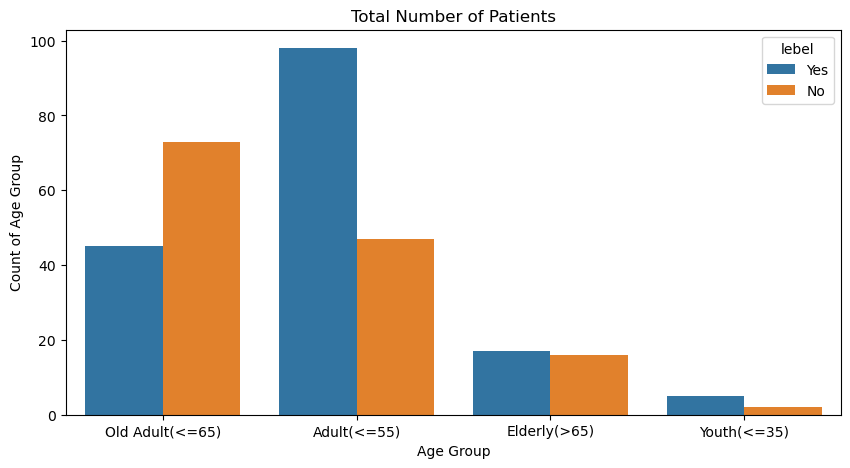

In [18]:
# Investigating the age group of the Patients by the target feature (label)
plt.figure(figsize=(10, 5))
sns.countplot(x='age_bracket', data=df, hue='lebel')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

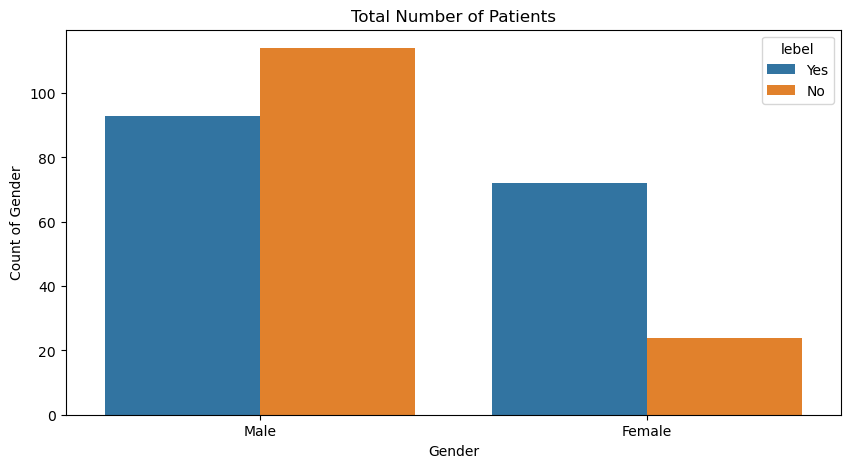

In [19]:
# Investigating the gender of the Patients by the target feature (label)
plt.figure(figsize=(10, 5))
sns.countplot(x='gender', data=df, hue='lebel')
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

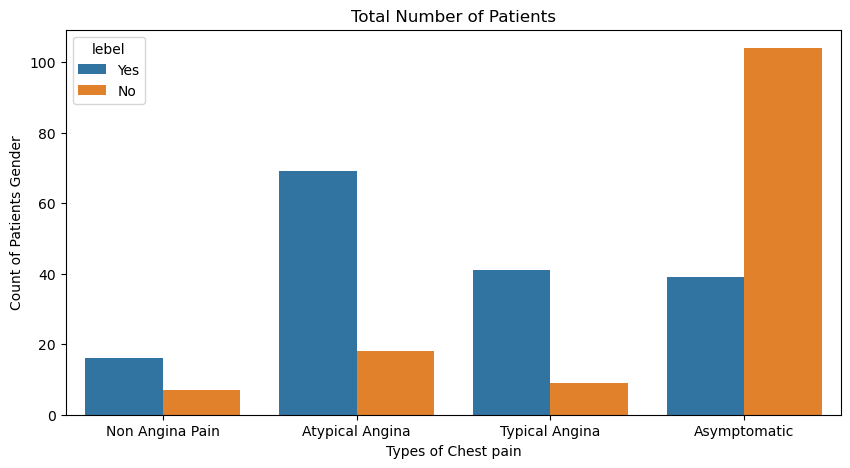

In [20]:
# Investigating the Chest pain Type of the Patients by the target feature (label)
plt.figure(figsize=(10, 5))
sns.countplot(x='cp_cat', data=df, hue='lebel')
plt.xlabel('Types of Chest pain')
plt.ylabel('Count of Patients Gender')
plt.title('Total Number of Patients')

In [21]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,lebel
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,Non Angina Pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,Atypical Angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,Typical Angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,Typical Angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,Asymptomatic,Yes


### EDA - Multivariant Analysis

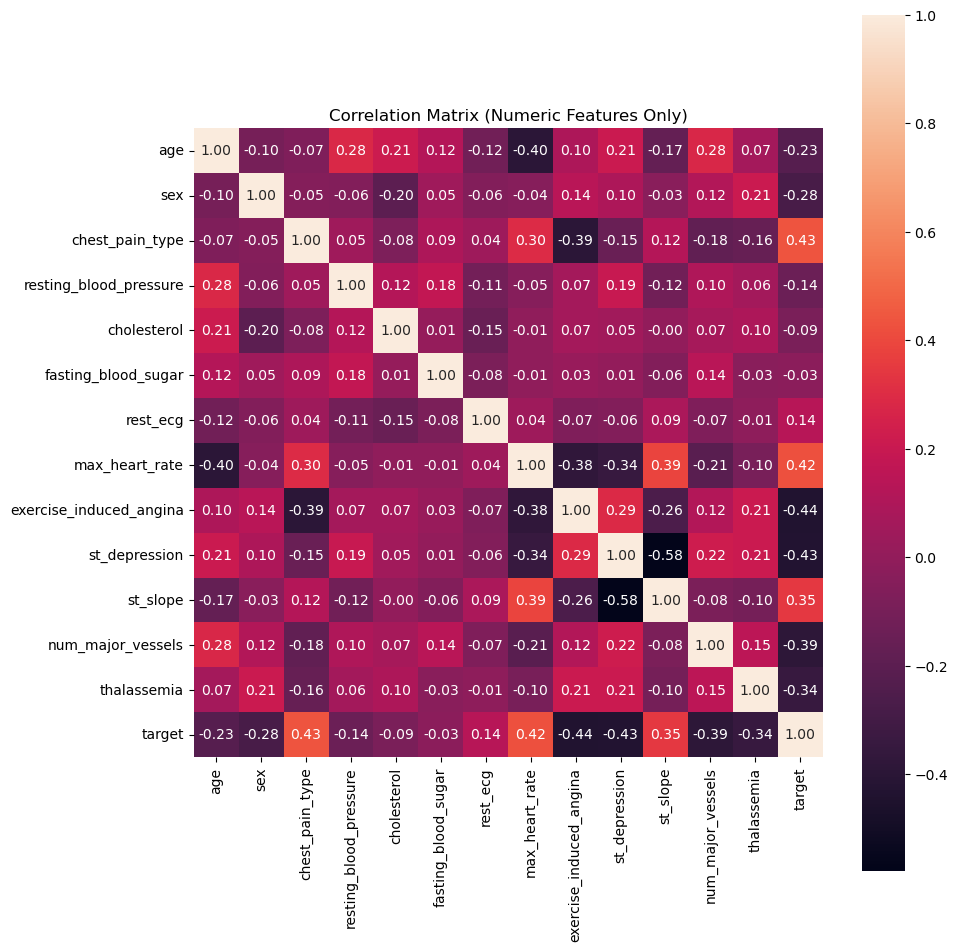

In [23]:
# Correlation btw age and other variables in the dataset
plt.figure(figsize=(10,10))
numeric_df = df.select_dtypes(include=['int64', 'float64']) # converting categorical data to numeric data)
hm = sns.heatmap(numeric_df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title("Correlation Matrix (Numeric Features Only)")
plt.tight_layout()
plt.show()

### Key Correlations with Target (Heart Disease)
Feature	Correlation	Interpretation
chest_pain_type	+0.43	Strong association: Specific chest pain types are linked to higher heart disease risk.

max_heart_rate	+0.42	Moderate positive link: Higher max heart rate correlates with heart disease.

exercise_induced_angina	-0.44	Strong negative link: Absence of angina during exercise predicts heart disease. Check encoding!

st_depression	-0.43	Moderate negative link: Lower ST depression (ECG measure) indicates higher risk.

num_major_vessels	-0.39	Moderate negative link: More vessels detected (e.g., blocked) reduce risk? Verify encoding!

thalassemia	-0.34	Weak negative link: Certain thalassemia types may reduce risk.

### Feature Engineering / Data Preprocessing

In [26]:
# Create a copy of the data (Exclude taget/ label along side wih other created columns at the end)#

df1 = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia']]

lebel = df[['target']]
        

In [27]:
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [28]:
lebel.head()

,target
0,1
1,1
2,1
3,1
4,1


In [29]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate               int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [30]:
# Dealing with Outliers - resting blood pressure, cholesterol, thallasemia

# Normalise the data

scaler = MinMaxScaler()

df1['Scaled_RBS'] = scaler.fit_transform(df1[['resting_blood_pressure']].values.reshape(-1,1))
df1['Scaled_chol'] = scaler.fit_transform(df1[['cholesterol']].values.reshape(-1,1))
df1['Scaled_thal'] = scaler.fit_transform(df1[['thalassemia']].values.reshape(-1,1))
df1['Scaled_max_heart_rate'] = scaler.fit_transform(df1[['max_heart_rate']].values.reshape(-1,1))

df1.drop(['resting_blood_pressure', 'cholesterol', 'thalassemia', 'max_heart_rate'], axis=1, inplace=True)
df1.head()



,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBS,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


### Machine Learning

In [32]:
# split the data set into training and testing sets (x= Questions, y= Answers)
X_train, X_test, y_train, y_test = train_test_split(df1, lebel, test_size=0.2, random_state=42)

In [33]:
X_train.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBS,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153
75,55,0,1,0,0,0,1.4,1,0,0.386792,0.283105,0.666667,0.687023
176,60,1,0,1,1,1,1.4,2,2,0.216981,0.237443,1.000000,0.679389


In [34]:
y_train.head()

,target
132,1
202,0
196,0
75,1
176,0


In [35]:
# Model Building
# Logistics Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
ly_pred = logreg.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-Score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1-Score: 0.8571428571428571
AUC-ROC: 0.8529094827586207


#### Overall Interpretation:

The model performs consistently across all metrics (all around 85-87%), which is a good sign.
However, there is a slight skew towards precision over recall, which is an indication that the model is somewhat more focused on avoiding false positives than false negatives.
This is a solid performing model for many applications, but for critical applications where false negatives are costly (like disease detection), it needs further tuning to improve recall further.

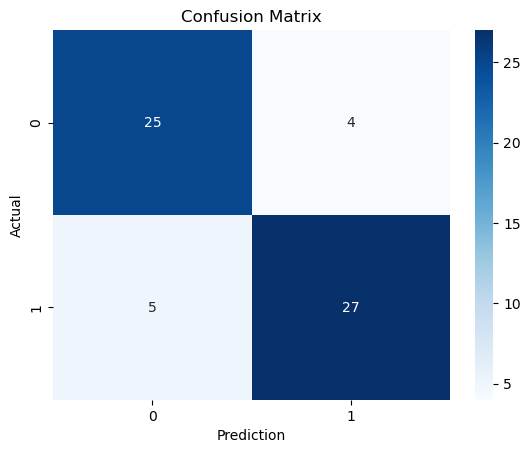

In [37]:
# Create the confusion Matrix
from sklearn.metrics import confusion_matrix
lcm = confusion_matrix(y_test, ly_pred)
# Visualize the confusion Matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Prediction")  
plt.ylabel("Actual")     
plt.title("Confusion Matrix")
plt.show()


### Interpretation of the confusion matrix for heart disease prediction model:

Confusion Matrix Structure
Assuming the correct layout (after resolving formatting ambiguities):

Predicted 0 (No Heart Disease)	        Predicted 1 (Heart Disease)
Actual 0	25 (True Negatives - TN)	4 (False Positives - FP)
Actual 1	5 (False Negatives - FN)	27 (True Positives - TP)

Key Metrics
True Positives (TP): 27

Correctly identified 27 patients with heart disease.

True Negatives (TN): 25

Correctly identified 25 patients without heart disease.

False Positives (FP): 4

4 patients were wrongly flagged as having heart disease (Type I error).

Implication: Unnecessary stress/tests for healthy patients.

False Negatives (FN): 5

5 patients with heart disease were missed (Type II error).

Implication: High risk of untreated conditions progressing.

In [39]:
# Model Building
# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-Score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Logistic Regression
Accuracy: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375
F1-Score: 0.84375
AUC-ROC: 0.8356681034482758


###   Interpretation 

The logistic regression model is making solid, trustworthy predictions for heart disease:

It is accurate, but more importantly, also catching the vast majority of people who actually have heart disease (high recall),

While still being reasonably careful about not mislabeling healthy people (high precision).

Overall, it balances well (F1), and distinguishes between classes clearly (AUC-ROC).

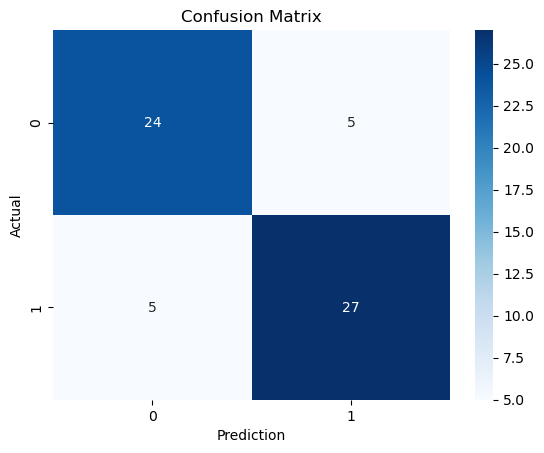

In [41]:
# Create the confusion Matrix
from sklearn.metrics import confusion_matrix
rcm = confusion_matrix(y_test, rfy_pred)
# Visualize the confusion Matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Prediction")  
plt.ylabel("Actual")     
plt.title("Confusion Matrix")
plt.show()

###  Interpretation

The model does a great job at identifying heart disease cases:

It correctly identifies 87.5% of all actual heart disease cases.

Its precision of ~84.85% means most positive predictions are trustworthy.

Only 4 cases of heart disease were missed (FN) — low, which is important in a clinical setting.

The balanced F1-score (~86%) confirms that the model handles both types of error reasonably well.

Overall Verdict
This is a well-performing model for a medical prediction task like heart disease. This aims for a balance between not missing real cases and avoiding unnecessary treatment.


In [43]:
# Machine Leaning Algorithm will be applied to all dataset
classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbors'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state=42), 'Decision tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]

In [44]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name =classifier[1]

    pred = model.predict(X_test)

    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])

    if model_name != classifiers[-1][1]:
        print('')
    

#classifiers

In [45]:
print('Accuracy Score')
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,81.97%,86.89%,75.41%,85.25%,65.57%,86.89%,85.25%,85.25%


In [46]:
print('Precision Score')
s2 = pd.DataFrame(precision_list)
s2.head()

Precision Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,86.21%,85.29%,79.31%,82.86%,65.71%,90.0%,92.59%,87.1%


In [47]:
print('Recall Score')
s3 = pd.DataFrame(recall_list)
s3.head()

Recall Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,78.12%,90.62%,71.88%,90.62%,71.88%,84.38%,78.12%,84.38%


In [48]:
print('ROC Score')
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,82.17%,86.69%,75.59%,84.97%,65.25%,87.02%,85.61%,85.29%
